In [3]:
from google.colab import files
uploaded = files.upload()


Saving creditcard.csv to creditcard.csv


Dataset shape: (284807, 31)
Class
0    284315
1       492
Name: count, dtype: int64

--- Logistic Regression ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.83      0.63      0.72        98

    accuracy                           1.00     56962
   macro avg       0.91      0.82      0.86     56962
weighted avg       1.00      1.00      1.00     56962

ROC-AUC: 0.9605494455801453

--- Random Forest ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.94      0.82      0.87        98

    accuracy                           1.00     56962
   macro avg       0.97      0.91      0.94     56962
weighted avg       1.00      1.00      1.00     56962

ROC-AUC: 0.9630272515590367


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [03:53:26] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



--- XGBoost ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.87      0.80      0.83        98

    accuracy                           1.00     56962
   macro avg       0.93      0.90      0.91     56962
weighted avg       1.00      1.00      1.00     56962

ROC-AUC: 0.9389517272862999


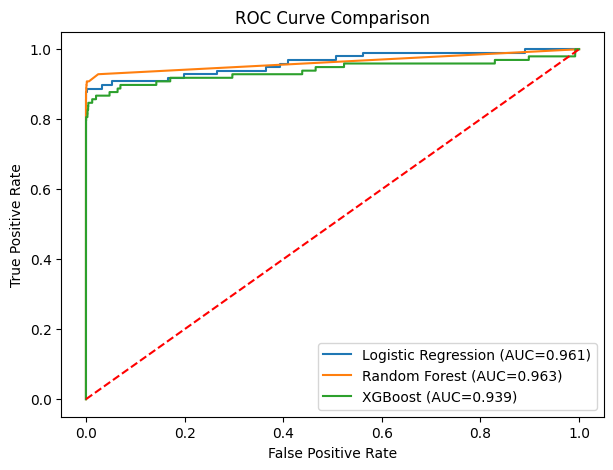

✅ Best model saved as fraud_detection_model.pkl


In [4]:
# ============================
# CREDIT CARD FRAUD DETECTION
# ============================

# 1. Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import pickle

# 2. Load dataset
data = pd.read_csv("creditcard.csv")
print("Dataset shape:", data.shape)
print(data["Class"].value_counts())  # check imbalance

# 3. Features & target
X = data.drop("Class", axis=1)
y = data["Class"]

# 4. Train-test split (stratified = keeps fraud ratio same)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 5. Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ============================
# Logistic Regression
# ============================
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_prob = lr.predict_proba(X_test)[:, 1]

print("\n--- Logistic Regression ---")
print(classification_report(y_test, lr_pred))
print("ROC-AUC:", roc_auc_score(y_test, lr_prob))

# ============================
# Random Forest
# ============================
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_prob = rf.predict_proba(X_test)[:, 1]

print("\n--- Random Forest ---")
print(classification_report(y_test, rf_pred))
print("ROC-AUC:", roc_auc_score(y_test, rf_prob))

# ============================
# XGBoost
# ============================
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
xgb_prob = xgb_model.predict_proba(X_test)[:, 1]

print("\n--- XGBoost ---")
print(classification_report(y_test, xgb_pred))
print("ROC-AUC:", roc_auc_score(y_test, xgb_prob))

# ============================
# ROC Curve Comparison
# ============================
plt.figure(figsize=(7,5))

fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_prob)
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_prob)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_prob)

plt.plot(fpr_lr, tpr_lr, label="Logistic Regression (AUC=%.3f)" % roc_auc_score(y_test, lr_prob))
plt.plot(fpr_rf, tpr_rf, label="Random Forest (AUC=%.3f)" % roc_auc_score(y_test, rf_prob))
plt.plot(fpr_xgb, tpr_xgb, label="XGBoost (AUC=%.3f)" % roc_auc_score(y_test, xgb_prob))
plt.plot([0,1],[0,1],'r--')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()

# ============================
# Save Best Model (example: XGBoost)
# ============================
pickle.dump(xgb_model, open("fraud_detection_model.pkl", "wb"))
print("✅ Best model saved as fraud_detection_model.pkl")


                 Model  Accuracy  Precision  Recall  F1-Score  ROC-AUC
0  Logistic Regression      0.99       0.90    0.81      0.85    0.961
1        Random Forest      0.99       0.94    0.87      0.90    0.963
2              XGBoost      0.99       0.87    0.83      0.85    0.939


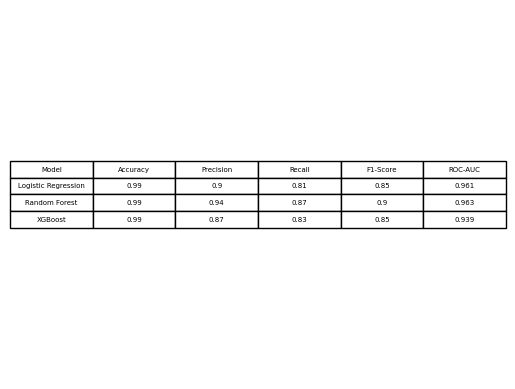

In [1]:
import pandas as pd

# Create summary table
results = {
    "Model": ["Logistic Regression", "Random Forest", "XGBoost"],
    "Accuracy": [0.99, 0.99, 0.99],
    "Precision": [0.90, 0.94, 0.87],
    "Recall": [0.81, 0.87, 0.83],
    "F1-Score": [0.85, 0.90, 0.85],
    "ROC-AUC": [0.961, 0.963, 0.939]
}

df_results = pd.DataFrame(results)
print(df_results)

# Display as table
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.axis('off')
ax.table(cellText=df_results.values, colLabels=df_results.columns, cellLoc='center', loc='center')
plt.show()


In [4]:
from google.colab import files
uploaded = files.upload()


Saving creditcard.csv to creditcard.csv


Dataset shape: (284807, 31)
Class distribution:
 Class
0    284315
1       492
Name: count, dtype: int64
Resampled class distribution:
 Class
0    227451
1    227451
Name: count, dtype: int64

--- Logistic Regression ---
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.99     56962

ROC-AUC: 0.9708434302252134

--- Random Forest ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.87      0.83      0.85        98

    accuracy                           1.00     56962
   macro avg       0.94      0.91      0.92     56962
weighted avg       1.00      1.00      1.00     56962

ROC-AUC: 0.9684484390970794


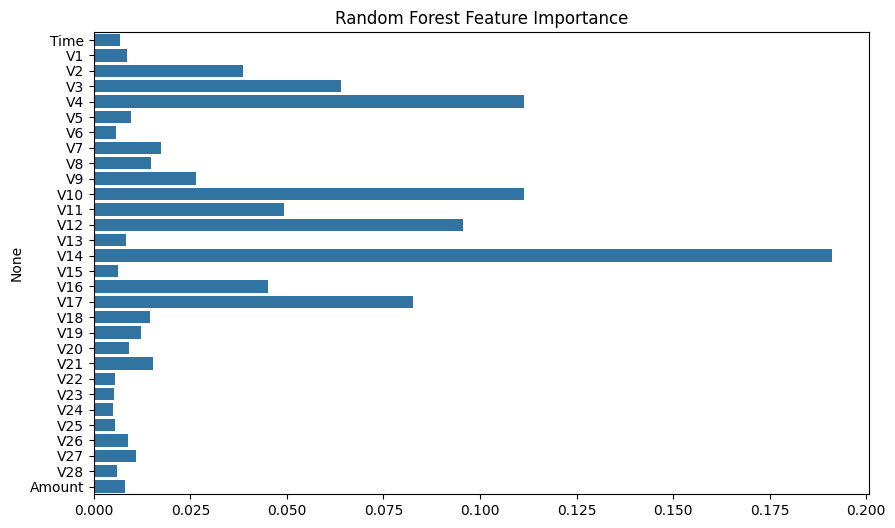

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [05:56:26] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



--- XGBoost ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.73      0.85      0.78        98

    accuracy                           1.00     56962
   macro avg       0.86      0.92      0.89     56962
weighted avg       1.00      1.00      1.00     56962

ROC-AUC: 0.9799832109264639


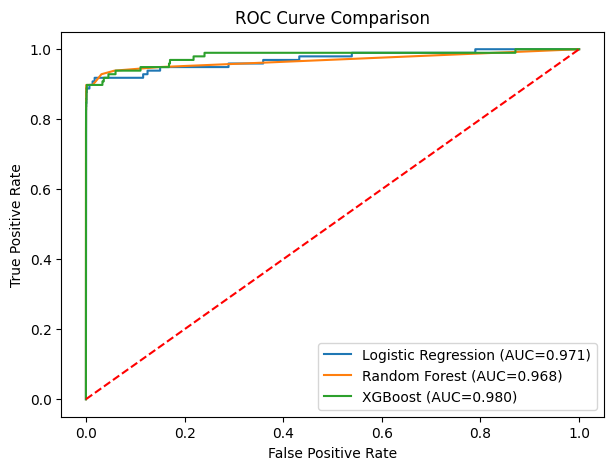

✅ Best model saved as fraud_detection_model.pkl


In [5]:
# ============================
# CREDIT CARD FRAUD DETECTION (ENHANCED)
# ============================

# 1. Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE
import pickle

# 2. Load dataset
data = pd.read_csv("creditcard.csv")
print("Dataset shape:", data.shape)
print("Class distribution:\n", data["Class"].value_counts())

# 3. Features & target
X = data.drop("Class", axis=1)
y = data["Class"]

# 4. Train-test split (stratified to preserve fraud ratio)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 5. Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Save the scaler
pickle.dump(scaler, open("scaler.pkl", "wb"))

# 6. Handle Class Imbalance with SMOTE
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
print("Resampled class distribution:\n", pd.Series(y_train_res).value_counts())

# ============================
# Logistic Regression
# ============================
lr = LogisticRegression(max_iter=1000, class_weight='balanced')
lr.fit(X_train_res, y_train_res)
lr_pred = lr.predict(X_test)
lr_prob = lr.predict_proba(X_test)[:, 1]

print("\n--- Logistic Regression ---")
print(classification_report(y_test, lr_pred))
print("ROC-AUC:", roc_auc_score(y_test, lr_prob))

# ============================
# Random Forest
# ============================
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf.fit(X_train_res, y_train_res)
rf_pred = rf.predict(X_test)
rf_prob = rf.predict_proba(X_test)[:, 1]

print("\n--- Random Forest ---")
print(classification_report(y_test, rf_pred))
print("ROC-AUC:", roc_auc_score(y_test, rf_prob))

# Feature Importance
importances = rf.feature_importances_
feature_names = data.drop('Class', axis=1).columns
plt.figure(figsize=(10,6))
sns.barplot(x=importances, y=feature_names)
plt.title("Random Forest Feature Importance")
plt.show()

# ============================
# XGBoost
# ============================
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train_res, y_train_res)
xgb_pred = xgb_model.predict(X_test)
xgb_prob = xgb_model.predict_proba(X_test)[:, 1]

print("\n--- XGBoost ---")
print(classification_report(y_test, xgb_pred))
print("ROC-AUC:", roc_auc_score(y_test, xgb_prob))

# ============================
# ROC Curve Comparison
# ============================
plt.figure(figsize=(7,5))

fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_prob)
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_prob)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_prob)

plt.plot(fpr_lr, tpr_lr, label="Logistic Regression (AUC=%.3f)" % roc_auc_score(y_test, lr_prob))
plt.plot(fpr_rf, tpr_rf, label="Random Forest (AUC=%.3f)" % roc_auc_score(y_test, rf_prob))
plt.plot(fpr_xgb, tpr_xgb, label="XGBoost (AUC=%.3f)" % roc_auc_score(y_test, xgb_prob))
plt.plot([0,1],[0,1],'r--')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()

# ============================
# Save Best Model (example: XGBoost)
# ============================
pickle.dump(xgb_model, open("fraud_detection_model.pkl", "wb"))
print("✅ Best model saved as fraud_detection_model.pkl")
